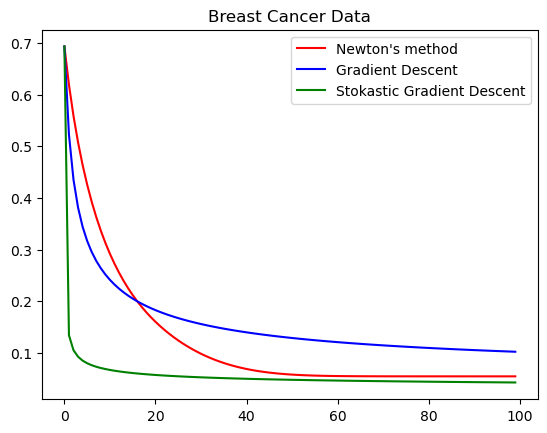

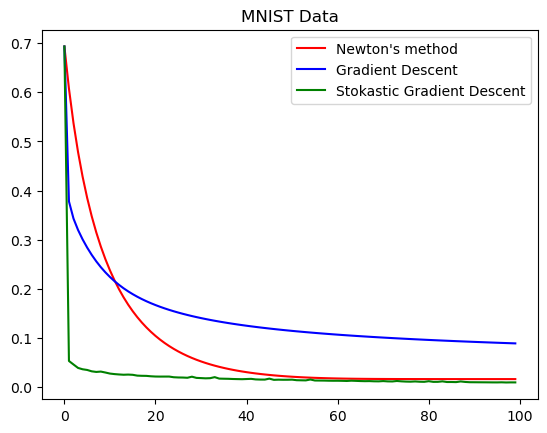

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  2 15:23:57 2021

@author: Alex Bradshaw

Linear Regression
"""

import numpy as np
import sklearn as sk
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt

'''
To load breastcancer data set type= 1
To load MNIST data set type= 2
'''
#Type = 1

for Type in [1, 2]:
    if(Type == 2):
        dataset = sk.datasets.fetch_openml('MNIST_784', as_frame=False)
        Data = "MNIST Data"
        training = 0.07
        gamma = 1e-6

    if(Type == 1):
        dataset = sk.datasets.load_breast_cancer()
        training = 0.8
        Data = "Breast Cancer Data"

    X = dataset.data
    Y = dataset.target
    if(Type == 2):
        labels = dataset.target
        N = len(labels)
        Yk = np.zeros(N)
        for i in range(N):
            if(labels[i] != '0'):
                Yk[i] = 1
        X = X/255
        Y = Yk
    X_train, X_val, Y_train, Y_val = \
        sk.model_selection.train_test_split(
            X, Y, train_size=training, random_state=123)

    # standardize
    if(Type == 1):
        mu = np.mean(X_train, axis=0)
        s = np.std(X_train, axis=0)
        X_train = (X_train-mu)/s
        X_val = (X_val - mu)/s

    X_train = np.insert(X_train, 0, 1, axis=1)
    X_val = np.insert(X_val, 0, 1, axis=1)

    def eval_L(beta, x, y, gamma):
        N = x.shape[0]
        total = 0
        for i in range(N):
            pt1 = cross_entropy(y[i], sigmoid((x[i].T)@beta))
            pt2 = (gamma / 2) * np.linalg.norm(beta)**2
            total += pt1 + pt2
        return total/N

    def grad_L(beta, x, y, gamma):
        N = x.shape[0]
        total = 0
        for i in range(N):
            xi = x[i]
            pt1 = (sigmoid(xi.T@beta)-y[i])*xi
            pt2 = gamma*beta
            total += pt1 + pt2
        return total/N

    def cross_entropy(p, q):
        return -p*np.log(q) - (1-p)*np.log(1-q)

    def sigmoid(u):
        eu = np.exp(u)
        return eu / (1+eu)

    def Hessian(beta, x, gamma):
        N = x.shape[0]
        d = x.shape[1]-1

        H = np.zeros((d+1, d+1))
        s_vals = sigmoid(x @ beta)
        s_vals = np.reshape(s_vals, (N, 1))
        M = (s_vals - s_vals**2) * x

        H = (1/N) * (x.T @ M) + gamma*np.identity(d+1)

        ''' Old Hessian Calculation
        for i in range(N):
            xi = x[i]
            ui = np.vdot(xi,beta)
            s = sigmoid(ui)

            H = H + (s - s**2)*np.outer(xi,xi) + gamma * np.identity(d+1)

        H = H * (1/N)
        '''
        return H

    def newtons(beta, t, n, x, y, gamma, LVals):
        for i in range(n):
            LVals.append(eval_L(beta, x, y, gamma))
            beta = beta - t * \
                np.linalg.solve(Hessian(beta, x, gamma),
                                grad_L(beta, x, y, gamma))
            #print("Newton Iteration:",i)
        return beta

    def GradientDescent(beta, t, n, x, y, gamma, LVals):
        for i in range(max_iter):
            LVals.append(eval_L(beta, x, y, gamma))
            beta = beta - t*grad_L(beta, x, y, gamma)
            #print("Gradient Descent iteration:", i)
        return beta

    def StochasticGradientDescent(beta, t, num_epochs, x, y, gamma, LVals):
        for ep in range(num_epochs):
            LVals.append(eval_L(beta, x, y, gamma))
            shuffled_idxs = np.random.permutation(x.shape[0])
            #print("Epoch number:", ep)
            for i in shuffled_idxs:
                xiHat = x[i]
                yi = y[i]
                gi = (sigmoid(xiHat.T@beta) - yi)*xiHat
                beta = beta - t*gi
        return beta

    if(Type == 1):

        tN = 1e-1
        tG = 1e-1
        tS = 1e-2

        gammaN = 1e-3
        gammaG = 1e-17
        gammaS = 1e-7

        num_epochs = 100

    if(Type == 2):
        tN = 1e-1
        tG = 1e-1
        tS = 1e-2

        gammaN = 1e-4
        gammaG = 1e-18
        gammaS = 1e-7

        num_epochs = 100

    betakN = np.zeros(X.shape[1]+1)
    betakG = np.zeros(X.shape[1]+1)
    betakS = np.zeros(X.shape[1]+1)

    max_iter = 100

    LVals_Newton = []
    LVals_Gradient = []
    LVals_SGD = []

    ''' Newton's Method'''
    newtons(betakN, tN, max_iter, X_train, Y_train, gammaN, LVals_Newton)

    '''Gradient descent'''

    GradientDescent(betakG, tG, max_iter, X_train,
                    Y_train, gammaG, LVals_Gradient)

    '''Stochastic Gradient Descent'''

    StochasticGradientDescent(betakS, tS, num_epochs,
                             X_train, Y_train, gammaS, LVals_SGD)

    '''
    #Testing GammaValues Code
    gammaVals = [1e-6, 1e-7, 1e-8, 1e-9]
    #tVals = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7, 1e-8, 1e-9]
    #minList = [100, 100, 100]
    #for j in range(len(tVals)):
    for i in range(len(gammaVals)):
        betaTest = np.zeros(X.shape[1]+1)
        newList = []
        StochasticGradientDescent(betaTest, 1e-2, num_epochs, X_train, Y_train, gammaVals[i], newList)

        plt.plot(newList[89:], label = (gammaVals[i]))
        print("gamma value:", gammaVals[i])  

    plt.legend()
    #%%
    '''
    
    plt.figure()
    plt.plot(LVals_Newton, label="Newton's method", color="red")
    plt.plot(LVals_Gradient, label="Gradient Descent", color="blue")
    plt.plot(LVals_SGD, label="Stocfhastic Gradient Descent", color="green")
    plt.title(Data)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    '''
    Stochastic Gradient Descent vastly out performs the other two methods. I believe this is because of its
    randomness factor that allows it generate more accurate results and much more quickly. I think newton's
    method is the slowest and second most accurate because the hessian matrix takes a while to whittle down
    but once optimized because more accurate than gradient descent. Gradient descent is the least accurate
    I think because it is hard to find an efficient but precise enough step size- which is why it's quicker than
    newton's method because it has that ability to get closer quicker but has trouble being precise. 
    '''
